Student name: Fahmi Afri

Student pace: part time

Scheduled project review date/time: 7/11/2022

Instructor name: Hardik Idnani

Blog post URL: https://github.com/fhmiafri/capstone_project

In [1]:
#import libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loadind dataset from csv file to pandas dataframe
data = pd.read_csv ('C:/Users/fahmi/Downloads/PakWheelsDataSet.csv.zip')

In [3]:
#inspect the first 5 rows
data.head()

,Unnamed: 0,Make,Name,Transmission,Engine Type,Engine Capacity(CC),Mileage(kms),City,Year,Price
0,0,Honda,BR-V i-VTEC S,Automatic,Petrol,1500.0,41371,Karachi,2017,3150000.0
1,1,Toyota,Corolla Altis Automatic 1.6,Automatic,Petrol,1600.0,2460,Karachi,2021,3575000.0
2,2,Toyota,Vitz F Limited II 1.0,Automatic,Petrol,1000.0,67000,Karachi,2014,1955000.0
3,3,Daihatsu,Move Custom X Limited,Automatic,Petrol,660.0,64000,Lahore,2013,1450000.0
4,4,Toyota,Prado TX L Package 2.7,Automatic,Petrol,2700.0,64000,Lahore,2016,19000000.0


In [4]:
#getting information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76690 entries, 0 to 76689
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           76690 non-null  int64  
 1   Make                 76690 non-null  object 
 2   Name                 76690 non-null  object 
 3   Transmission         76690 non-null  object 
 4   Engine Type          76690 non-null  object 
 5   Engine Capacity(CC)  76687 non-null  float64
 6   Mileage(kms)         76690 non-null  int64  
 7   City                 76690 non-null  object 
 8   Year                 76690 non-null  int64  
 9   Price                76690 non-null  float64
dtypes: float64(2), int64(3), object(5)
memory usage: 5.9+ MB


In [5]:
#checking the number of rows and columns
data.shape

(76690, 10)

In [6]:
#checking for duplicates
len(set(data['Unnamed: 0']))

76690

In [7]:
#checking columns
data.columns

Index(['Unnamed: 0', 'Make', 'Name', 'Transmission', 'Engine Type',
       'Engine Capacity(CC)', 'Mileage(kms)', 'City', 'Year', 'Price'],
      dtype='object')

In [8]:
#dropping unneccessary columns
data=data.drop(['Unnamed: 0','City'], axis=1)

In [9]:
data.head()

,Make,Name,Transmission,Engine Type,Engine Capacity(CC),Mileage(kms),Year,Price
0,Honda,BR-V i-VTEC S,Automatic,Petrol,1500.0,41371,2017,3150000.0
1,Toyota,Corolla Altis Automatic 1.6,Automatic,Petrol,1600.0,2460,2021,3575000.0
2,Toyota,Vitz F Limited II 1.0,Automatic,Petrol,1000.0,67000,2014,1955000.0
3,Daihatsu,Move Custom X Limited,Automatic,Petrol,660.0,64000,2013,1450000.0
4,Toyota,Prado TX L Package 2.7,Automatic,Petrol,2700.0,64000,2016,19000000.0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76690 entries, 0 to 76689
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Make                 76690 non-null  object 
 1   Name                 76690 non-null  object 
 2   Transmission         76690 non-null  object 
 3   Engine Type          76690 non-null  object 
 4   Engine Capacity(CC)  76687 non-null  float64
 5   Mileage(kms)         76690 non-null  int64  
 6   Year                 76690 non-null  int64  
 7   Price                76690 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 4.7+ MB


In [11]:
#checking for missing values
data.isnull().sum()

Make                   0
Name                   0
Transmission           0
Engine Type            0
Engine Capacity(CC)    3
Mileage(kms)           0
Year                   0
Price                  0
dtype: int64

In [12]:
#dropping 3 nan values 
data = data[~data['Engine Capacity(CC)'].isna()]

In [13]:
data.shape

(76687, 8)

In [14]:
data.columns

Index(['Make', 'Name', 'Transmission', 'Engine Type', 'Engine Capacity(CC)',
       'Mileage(kms)', 'Year', 'Price'],
      dtype='object')

In [25]:
data.rename(columns={'EngineCapacity(CC)':'EngineCapacity_cc', 'Mileage(kms)':'Mileage_kms'}, inplace=True)

In [17]:
#removing space in columns name
data.columns = data.columns.str.replace(' ', '')

In [18]:
data.columns

Index(['Make', 'Name', 'Transmission', 'EngineType', 'EngineCapacity(CC)',
       'Mileage_kms', 'Year', 'Price'],
      dtype='object')

In [19]:
#checking unique values
data['Make'].unique()

array(['Honda', 'Toyota', 'Daihatsu', 'Range', 'Suzuki', 'Mercedes',
       'BMW', 'KIA', 'Hyundai', 'MG', 'Nissan', 'Mazda', 'FAW',
       'Mitsubishi', 'Prince', 'Changan', 'Audi', 'Haval', 'Jeep',
       'Proton', 'DFSK', 'Dodge', 'Ford', 'BAIC', 'Land', 'Lexus',
       'Porsche', 'Volkswagen', 'Daehan', 'Chevrolet', 'Hino', 'Subaru',
       'GMC', 'MINI', 'Isuzu', 'Daewoo', 'United', 'SsangYong', 'Adam',
       'Others', 'Cadillac', 'Willys', 'Chrysler', 'Geely', 'JAC', 'JW',
       'Sogo', 'Datsun', 'Chery', 'Fiat', 'Hummer', 'Vauxhall', 'Master',
       'Morris', 'Citroen', 'Dongfeng', 'JMC', 'Mushtaq', 'Bentley',
       'Jaguar', 'Pontiac', 'Austin', 'Classic', 'ZOTYE', 'Volvo', 'Roma'],
      dtype=object)

In [20]:
data['Transmission'].unique()

array(['Automatic', 'Manual'], dtype=object)

In [21]:
data['EngineType'].unique()

array(['Petrol', 'CNG', 'Hybrid', 'Diesel', 'LPG'], dtype=object)

In [22]:
data['Mileage_kms'].unique()

array([ 41371,   2460,  67000, ..., 114987,  11662,  52840], dtype=int64)

In [23]:
data['Year'].unique()

array([2017, 2021, 2014, 2013, 2016, 2009, 2019, 2006, 2005, 2018, 2007,
       1999, 2011, 2001, 2008, 2012, 2010, 2015, 1990, 2003, 2020, 2002,
       1997, 2004, 1994, 1995, 1984, 1996, 1986, 1993, 1998, 1988, 1992,
       1991, 2000, 1967, 1983, 1982, 1985, 1987, 1989, 1981, 1972, 1970,
       1978, 1973, 1963, 1974, 1977, 1976, 1979, 1980, 1969, 1961, 1966,
       1942, 1975, 1968, 1960, 1959, 1965, 1964, 1951, 1940, 1962, 1952,
       1950, 1971], dtype=int64)

In [26]:
data['EngineCapacity_cc'].unique()

array([1500., 1600., 1000.,  660., 2700., 4200., 2600., 1800.,  800.,
       1400., 1300., 4600., 2000., 2400., 2500., 4700., 1100., 3000.,
       1200., 4608., 4000., 2800., 3400., 4400., 3500., 1900., 5700.,
       4500., 3200., 5000., 3300., 2100.,  100.,  270., 5600., 6200.,
       1700., 5663., 3378., 4164.,  900., 2200., 5500., 4663.,  300.,
       2300.,  123.,  860.,  600.,  200., 5400., 3348., 6600., 2879.,
       3450., 6400., 4300., 2900., 3342., 3600., 1198., 2255., 4230.,
       6000., 4965.,  698., 5300., 1323., 6603.,  853., 4461.,   16.,
       4800., 4160.,  700., 1668., 3431., 3700., 5676.,  570., 3800.,
       5125.,  696.,  552.,  880., 3950.,  870., 4100.,  215., 3100.,
       1122., 2171.,  750., 1699., 2599., 6208., 5959., 2950.,  933.,
       2906., 5834., 4999., 5552., 4104.,  896., 4660., 2268., 3150.,
       5555.])

In [27]:
data.isnull().sum()

Make                 0
Name                 0
Transmission         0
EngineType           0
EngineCapacity_cc    0
Mileage_kms          0
Year                 0
Price                0
dtype: int64

In [28]:
#cheking the distribution of categorical data
print(data.Transmission.value_counts())
print(data.EngineType.value_counts())
print(data.Year.value_counts())

Automatic    44107
Manual       32580
Name: Transmission, dtype: int64
Petrol    68888
Diesel     3661
Hybrid     3509
CNG         616
LPG          13
Name: EngineType, dtype: int64
2018    6893
2021    6868
2017    5795
2016    5310
2015    4479
        ... 
1962       1
1942       1
1940       1
1966       1
1950       1
Name: Year, Length: 68, dtype: int64


In [29]:
data.describe()

,EngineCapacity_cc,Mileage_kms,Year,Price
count,76687.000000,76687.000000,76687.000000,7.668700e+04
mean,1499.699806,87962.008854,2011.999100,3.023153e+06
std,723.373657,78759.333327,7.371107,4.303289e+06
min,16.000000,1.000000,1940.000000,5.000000e+05
25%,1000.000000,39000.000000,2007.000000,1.215000e+06
50%,1300.000000,79900.000000,2014.000000,2.025000e+06
75%,1800.000000,119800.000000,2018.000000,3.200000e+06
max,6603.000000,999999.000000,2021.000000,9.350000e+07


The minimum engine capacity(cc) is very rarely to be under 660cc nowadays , and having 1km for the mileage(kms) for a used car is not very rational behavior . 

In [30]:
data[data['EngineCapacity_cc']>6000]

,Make,Name,Transmission,EngineType,EngineCapacity_cc,Mileage_kms,Year,Price
2455,GMC,Sierra,Automatic,Petrol,6200.0,19375,2019,26900000.0
5117,Mercedes,Benz G Class G 63 AMG,Automatic,Petrol,6200.0,22645,2016,93500000.0
5567,Cadillac,Escalade Ext,Automatic,Petrol,6200.0,87000,2007,5000000.0
7017,GMC,Sierra,Automatic,Petrol,6200.0,19375,2019,26900000.0
10987,Nissan,Roox HIGHWAY STAR URBAN SELECTION...,Automatic,Petrol,6600.0,77000,2016,1450000.0
12429,Jeep,Cherokee,Automatic,Petrol,6400.0,26000,2013,24000000.0
12430,Ford,F 150 Raptor 5.0L,Automatic,Petrol,6200.0,33000,2011,16000000.0
12721,Ford,F 150 Raptor 5.0L,Automatic,Petrol,6200.0,70000,2014,11800000.0
18006,Mercedes,Benz C Class C63 AMG,Automatic,Petrol,6200.0,60000,2009,11500000.0
21604,Mitsubishi,I Mivec,Automatic,Petrol,6603.0,985000,2007,975000.0


In [31]:
data[data['EngineCapacity_cc']<660]

,Make,Name,Transmission,EngineType,EngineCapacity_cc,Mileage_kms,Year,Price
1291,Toyota,Corolla GLi 1.3,Automatic,Petrol,100.0,200000,1982,560000.0
2281,Hino,FG1J,Manual,Diesel,270.0,200000,2012,6000000.0
2360,Honda,Civic EK,Manual,Petrol,100.0,149161,1997,665000.0
5283,Suzuki,Bolan,Manual,Petrol,300.0,94000,2016,950000.0
5486,Toyota,Corolla GLi Automatic 1.3 VVTi fo...,Automatic,Petrol,100.0,58000,2017,2850000.0
6067,Toyota,Vitz,Automatic,Petrol,100.0,1,1999,1050000.0
6258,Toyota,Passo,Automatic,Petrol,123.0,123,2016,2300000.0
7678,Suzuki,Every Wagon PZ Turbo Special for ...,Automatic,Petrol,600.0,40000,2018,1900000.0
8184,Mercedes,Benz C Class C200,Automatic,Petrol,200.0,170000,2007,3500000.0
9713,KIA,Sportage,Manual,Petrol,200.0,123456,2003,1050000.0


In [32]:
data[data['Mileage_kms']>900000]

,Make,Name,Transmission,EngineType,EngineCapacity_cc,Mileage_kms,Year,Price
3670,Toyota,Hiace DX,Manual,Diesel,2400.0,987654,1987,750000.0
14032,Toyota,Hilux Vigo Champ TRD Sportivo fo...,Automatic,Diesel,2500.0,980000,2016,5550000.0
14715,Honda,Fit 1.5 Hybrid S Package,Automatic,Hybrid,1500.0,920000,2014,2395000.0
16004,Honda,Civic Reborn VTi Oriel 1.8 i-VTEC f...,Manual,Petrol,1800.0,950000,2007,1540000.0
16348,Suzuki,Cultus VXLi,Manual,Petrol,1000.0,985000,2009,850000.0
...,...,...,...,...,...,...,...,...
73109,Suzuki,APV GLX (CNG),Manual,Petrol,1500.0,999999,2007,1250000.0
74348,Daihatsu,Mira Cocoa PLUS G,Automatic,Petrol,660.0,950000,2012,1150000.0
75490,Suzuki,Bolan VX,Manual,Petrol,800.0,980000,2016,790000.0
75546,Suzuki,Ravi Euro ll,Manual,Petrol,800.0,911183,2017,950000.0


In [33]:
data[data['Mileage_kms']<100]

,Make,Name,Transmission,EngineType,EngineCapacity_cc,Mileage_kms,Year,Price
56,Suzuki,Alto VXR,Manual,Petrol,660.0,10,2021,1665000.0
80,Hyundai,Sonata,Automatic,Petrol,2500.0,45,2021,8150000.0
81,MG,HS eHS,Automatic,Hybrid,1500.0,34,2021,6490000.0
83,Suzuki,Mehran VXR,Manual,Petrol,800.0,14,2012,650000.0
89,Toyota,Corolla Altis Grande X CVT-i 1.8 ...,Automatic,Petrol,1800.0,15,2021,4500000.0
...,...,...,...,...,...,...,...,...
76640,Suzuki,Mehran VX (CNG),Manual,CNG,800.0,16,2012,580000.0
76650,Suzuki,Mehran VX (CNG),Manual,CNG,800.0,16,2012,580000.0
76660,Suzuki,Mehran VX (CNG),Manual,CNG,800.0,16,2012,580000.0
76670,Suzuki,Mehran VX (CNG),Manual,CNG,800.0,16,2012,580000.0


In [34]:
#remove mileage under 100kms as it is not acceptable for a used car
data = data[data.Mileage_kms >= 100]

In [35]:
#remove enginecapacity under 660cc 
data = data[data.EngineCapacity_cc >= 660]

In [36]:
data.shape

(72014, 8)

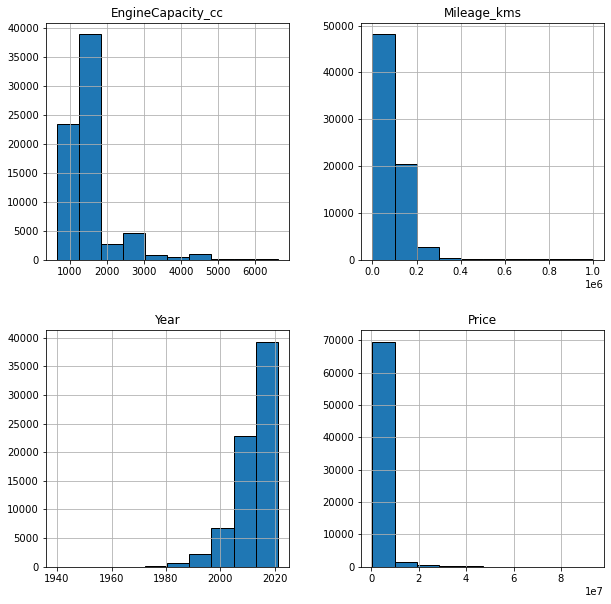

In [37]:
#plot data exploration
data.hist(figsize=(10,10), edgecolor = 'black');

In [38]:
data.columns

Index(['Make', 'Name', 'Transmission', 'EngineType', 'EngineCapacity_cc',
       'Mileage_kms', 'Year', 'Price'],
      dtype='object')

<AxesSubplot:xlabel='Transmission', ylabel='count'>

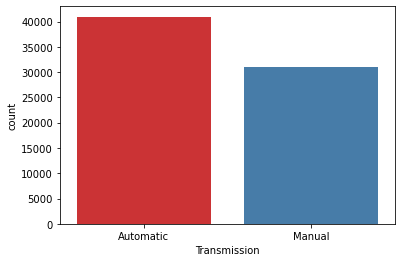

In [39]:
sns.countplot(x='Transmission', data=data, palette='Set1')

<AxesSubplot:xlabel='EngineType', ylabel='count'>

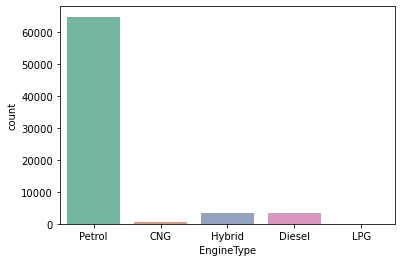

In [40]:
sns.countplot(x='EngineType', data=data, palette='Set2')

<function matplotlib.pyplot.show(close=None, block=None)>

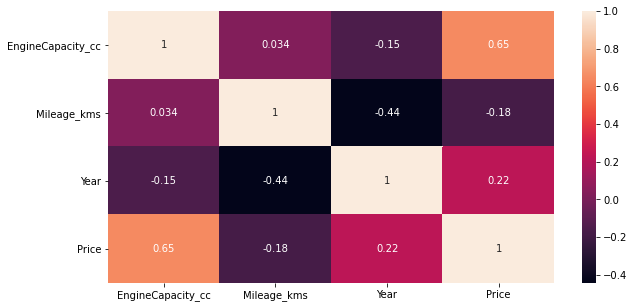

In [41]:
#visualize the corr between all features
cor=data.corr()
plt.figure(figsize=(10,5))
sns.heatmap(cor,annot=True)
plt.show

In [42]:
data.describe()

,EngineCapacity_cc,Mileage_kms,Year,Price
count,72014.000000,72014.000000,72014.000000,7.201400e+04
mean,1496.106479,93609.861152,2011.678521,2.956629e+06
std,728.022108,77934.578284,7.234528,4.315598e+06
min,660.000000,100.000000,1940.000000,5.000000e+05
25%,1000.000000,47000.000000,2007.000000,1.200000e+06
50%,1300.000000,83000.000000,2013.000000,1.980000e+06
75%,1800.000000,121318.750000,2017.000000,3.050000e+06
max,6603.000000,999999.000000,2021.000000,9.350000e+07


In [43]:
data.columns

Index(['Make', 'Name', 'Transmission', 'EngineType', 'EngineCapacity_cc',
       'Mileage_kms', 'Year', 'Price'],
      dtype='object')

<AxesSubplot:xlabel='Year', ylabel='Price'>

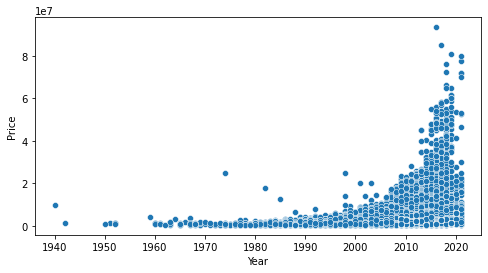

In [44]:
plt.figure(figsize =(8,4))
sns.scatterplot(x='Year', y='Price', data=data)

<AxesSubplot:xlabel='Mileage_kms', ylabel='Price'>

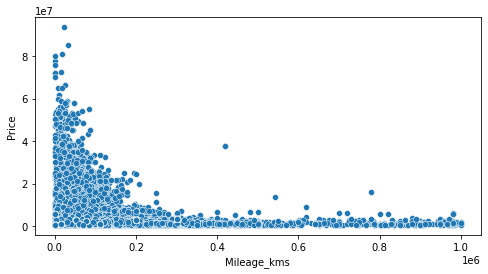

In [45]:
plt.figure(figsize =(8,4))
sns.scatterplot(x='Mileage_kms', y= 'Price', data=data)

<AxesSubplot:xlabel='EngineCapacity_cc', ylabel='Price'>

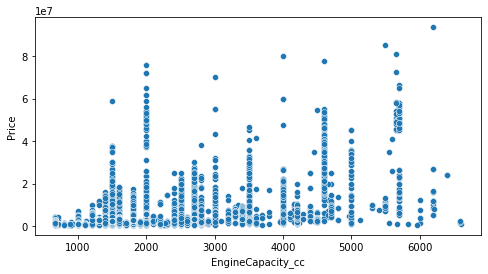

In [46]:
plt.figure(figsize =(8,4))
sns.scatterplot(x='EngineCapacity_cc', y='Price', data=data)

<AxesSubplot:xlabel='Transmission', ylabel='Price'>

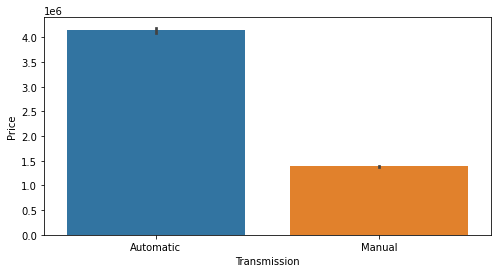

In [47]:
plt.figure(figsize =(8,4))
sns.barplot(x='Transmission', y='Price', data=data)

In [48]:
#making new variable
data_cleaned = data

In [49]:
def find_outliers_IQR(data_cleaned):

   q1=data_cleaned.quantile(0.25)

   q3=data_cleaned.quantile(0.75)

   IQR=q3-q1

   outliers = data_cleaned[((data_cleaned<(q1-1.5*IQR)) | (data_cleaned>(q3+1.5*IQR)))]

   return outliers

In [50]:
#checking outliers for mileages
outliers_kms = find_outliers_IQR(data_cleaned['Mileage_kms'])

print('number of outliers: '+ str(len(outliers_kms)))

print('max outlier value: '+ str(outliers_kms.max()))

print('min outlier value: '+ str(outliers_kms.min()))

outliers_kms

number of outliers: 2552
max outlier value: 999999
min outlier value: 232924


104      236000
177      234000
290      300000
308      235000
336      265000
          ...  
76642    300000
76652    300000
76662    300000
76672    300000
76682    300000
Name: Mileage_kms, Length: 2552, dtype: int64

In [51]:
#checking outliers for price
outliers_price = find_outliers_IQR(data_cleaned['Price'])

print('number of outliers: '+ str(len(outliers_price)))

print('max outlier value: '+ str(outliers_price.max()))

print('min outlier value: '+ str(outliers_price.min()))

outliers_price

number of outliers: 5586
max outlier value: 93500000.0
min outlier value: 5830000.0


4        19000000.0
5         8000000.0
21       27500000.0
54       33300000.0
64       25000000.0
            ...    
76647     5900000.0
76657     5900000.0
76667     5900000.0
76677     5900000.0
76687     5900000.0
Name: Price, Length: 5586, dtype: float64

In [52]:
#checking outliers for engine capacity
outliers_cc = find_outliers_IQR(data_cleaned['EngineCapacity_cc'])

print('number of outliers: '+ str(len(outliers_cc)))

print('max outlier value: '+ str(outliers_cc.max()))

print('min outlier value: '+ str(outliers_cc.min()))

outliers_cc

number of outliers: 2376
max outlier value: 6603.0
min outlier value: 3100.0


5        4200.0
21       4600.0
54       4600.0
87       4700.0
163      4200.0
          ...  
76106    3500.0
76143    4600.0
76187    3400.0
76308    4600.0
76362    4608.0
Name: EngineCapacity_cc, Length: 2376, dtype: float64

In [53]:
#checking outliers for year
outliers_year = find_outliers_IQR(data_cleaned['Year'])

print('number of outliers: '+ str(len(outliers_year)))

print('max outlier value: '+ str(outliers_year.max()))

print('min outlier value: '+ str(outliers_year.min()))

outliers_year

number of outliers: 1253
max outlier value: 1991
min outlier value: 1940


52       1990
165      1984
208      1990
301      1986
395      1988
         ... 
76131    1979
76153    1988
76216    1971
76217    1986
76297    1988
Name: Year, Length: 1253, dtype: int64

In [54]:
#selecting unacceptable outliers
upper_limit_kms = data_cleaned['Mileage_kms'].mean() + 3*data_cleaned['Mileage_kms'].std()

print(upper_limit_kms)

lower_limit_kms = data_cleaned['Mileage_kms'].mean() - 3*data_cleaned['Mileage_kms'].std()

print(lower_limit_kms)

327413.5960041848
-140193.87370018836


In [55]:
upper_limit_year = data_cleaned['Year'].mean() + 3*data_cleaned['Year'].std()

print(upper_limit_year)

lower_limit_year = data_cleaned['Year'].mean() - 3*data_cleaned['Year'].std()

print(lower_limit_year)

2033.3821036032173
1989.9749380831213


In [56]:
data_cleaned_filtered = data_cleaned[(data_cleaned["Year"] < upper_limit_year) & (data_cleaned["Year"] > lower_limit_year)]

In [57]:
data_cleaned_filtered.shape

(71094, 8)

In [58]:
data_cleaned_filtered = data_cleaned_filtered[(data_cleaned['Mileage_kms'] < upper_limit_kms) & (data_cleaned['Mileage_kms'] > lower_limit_kms)]

In [59]:
data_cleaned_filtered.shape

(70402, 8)

In [60]:
#setting the year after removing the outliers
data_cleaned_filtered.sort_values('Year')

,Make,Name,Transmission,EngineType,EngineCapacity_cc,Mileage_kms,Year,Price
37613,Toyota,Corolla DX,Automatic,Petrol,1300.0,230671,1990,825000.0
69455,Toyota,Hilux,Manual,Diesel,2800.0,185000,1990,1675000.0
26706,Toyota,Land Cruiser 80 Series,Manual,Diesel,2000.0,100000,1990,900000.0
14388,Mercedes,Benz E Class E280,Automatic,Diesel,2400.0,115000,1990,2150000.0
47252,Toyota,Prado,Automatic,Diesel,3000.0,123,1990,2350000.0
...,...,...,...,...,...,...,...,...
16915,Suzuki,Alto VXR,Manual,Petrol,660.0,900,2021,1725000.0
3094,KIA,Picanto 1.0 MT,Manual,Petrol,1000.0,7000,2021,2340000.0
3093,DFSK,Glory 580 Pro,Automatic,Petrol,1500.0,100,2021,5200000.0
73593,MG,HS 1.5 Turbo,Automatic,Petrol,1500.0,4000,2021,6400000.0


In [61]:
data_cleaned_filtered['Year'].unique()

array([2017, 2021, 2014, 2013, 2016, 2009, 2019, 2006, 2005, 2018, 2007,
       1999, 2011, 2001, 2008, 2012, 2010, 2015, 1990, 2003, 2020, 2002,
       1997, 2004, 1994, 1995, 1996, 1998, 1992, 1991, 2000, 1993],
      dtype=int64)

In [62]:
##setting the mileage(kms) after removing the outliers
data_cleaned_filtered.sort_values('Mileage_kms')

,Make,Name,Transmission,EngineType,EngineCapacity_cc,Mileage_kms,Year,Price
61320,Toyota,Prado 90 Series,Automatic,Diesel,3000.0,100,1996,3500000.0
61111,MG,HS 1.5 Turbo,Automatic,Petrol,1500.0,100,2021,5800000.0
39376,Suzuki,Ravi,Manual,Petrol,800.0,100,2021,1130000.0
42765,Toyota,Corolla 9th Generation GLi 1.3 for...,Manual,Petrol,1300.0,100,2006,1200000.0
39359,Suzuki,Alto VXR (CNG),Manual,Petrol,1000.0,100,2007,700000.0
...,...,...,...,...,...,...,...,...
2553,Toyota,Prius S Standard Package 1.5 for ...,Automatic,Hybrid,1500.0,325420,2007,1925000.0
48536,Honda,City i-DSI Vario,Automatic,Petrol,1300.0,325800,2006,1250000.0
40050,Suzuki,Mehran VX (CNG),Manual,Petrol,800.0,326850,2006,510000.0
63635,Toyota,Corolla 9th Generation 2.0D Saloon...,Manual,Diesel,2000.0,327000,2006,1250000.0


In [63]:
data_cleaned_filtered.describe()

,EngineCapacity_cc,Mileage_kms,Year,Price
count,70402.000000,70402.000000,70402.000000,7.040200e+04
mean,1489.019147,88512.031050,2012.097668,2.994836e+06
std,723.762673,58873.728283,6.482231,4.348946e+06
min,660.000000,100.000000,1990.000000,5.000000e+05
25%,1000.000000,46500.000000,2007.000000,1.230000e+06
50%,1300.000000,82000.000000,2014.000000,2.000000e+06
75%,1800.000000,120000.000000,2017.000000,3.100000e+06
max,6600.000000,327000.000000,2021.000000,9.350000e+07


The min and max for engine capacity , mileage and year are reasonably perfect for buying a used car . 

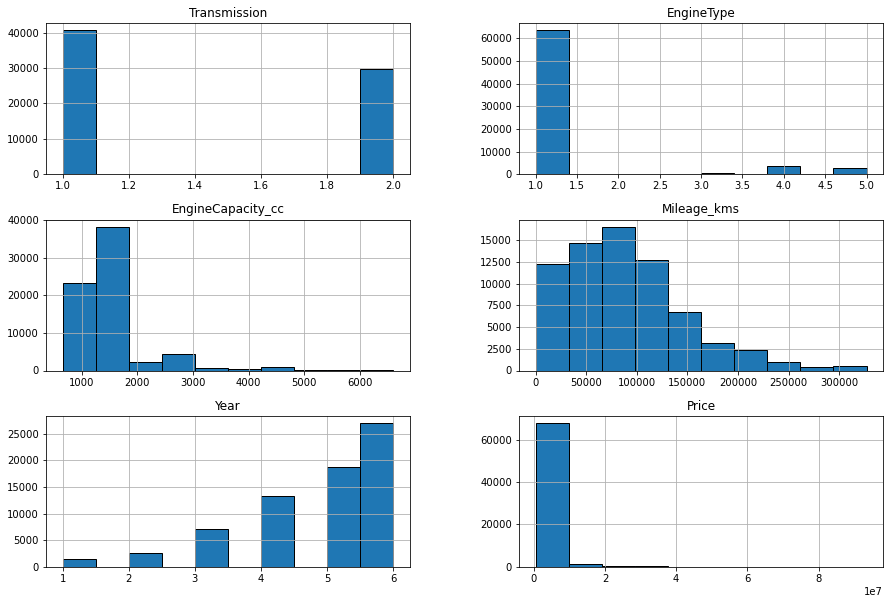

In [170]:
#plot data exploration after removing outliers
data_cleaned_filtered.hist(figsize=(15,10), edgecolor = 'black');

<AxesSubplot:xlabel='Transmission', ylabel='count'>

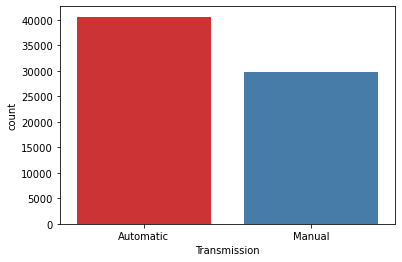

In [67]:
sns.countplot(x='Transmission', data=data_cleaned_filtered, palette='Set1')

<AxesSubplot:xlabel='EngineType', ylabel='count'>

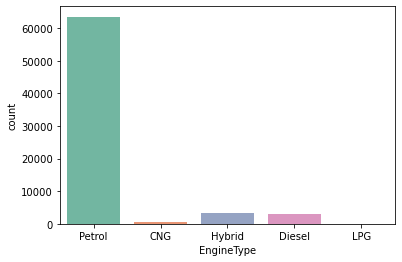

In [68]:
sns.countplot(x='EngineType', data=data_cleaned_filtered, palette='Set2')

<function matplotlib.pyplot.show(close=None, block=None)>

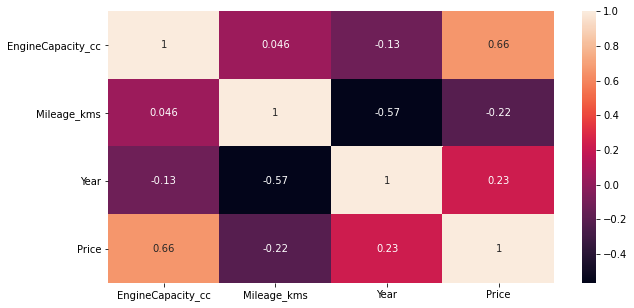

In [69]:
cor=data_cleaned_filtered.corr()
plt.figure(figsize=(10,5))
sns.heatmap(cor,annot=True)
plt.show

<AxesSubplot:xlabel='Year', ylabel='Price'>

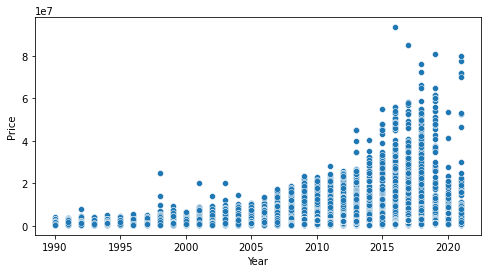

In [70]:
plt.figure(figsize =(8,4))
sns.scatterplot(x='Year', y='Price', data=data_cleaned_filtered)

<AxesSubplot:xlabel='Mileage_kms', ylabel='Price'>

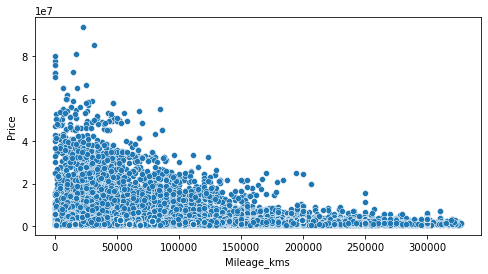

In [71]:
plt.figure(figsize =(8,4))
sns.scatterplot(x='Mileage_kms', y='Price', data=data_cleaned_filtered)

<AxesSubplot:xlabel='EngineCapacity_cc', ylabel='Price'>

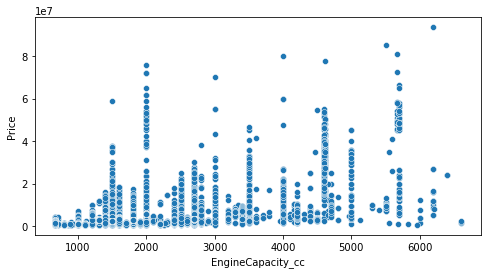

In [72]:
plt.figure(figsize =(8 ,4))
sns.scatterplot(x='EngineCapacity_cc', y='Price', data=data_cleaned_filtered)

In [73]:
data_cleaned_filtered.corr()

,EngineCapacity_cc,Mileage_kms,Year,Price
EngineCapacity_cc,1.000000,0.045583,-0.125214,0.659212
Mileage_kms,0.045583,1.000000,-0.565992,-0.215334
Year,-0.125214,-0.565992,1.000000,0.227133
Price,0.659212,-0.215334,0.227133,1.000000


In [74]:
data_cleaned_filtered.head()

,Make,Name,Transmission,EngineType,EngineCapacity_cc,Mileage_kms,Year,Price
0,Honda,BR-V i-VTEC S,Automatic,Petrol,1500.0,41371,2017,3150000.0
1,Toyota,Corolla Altis Automatic 1.6,Automatic,Petrol,1600.0,2460,2021,3575000.0
2,Toyota,Vitz F Limited II 1.0,Automatic,Petrol,1000.0,67000,2014,1955000.0
3,Daihatsu,Move Custom X Limited,Automatic,Petrol,660.0,64000,2013,1450000.0
4,Toyota,Prado TX L Package 2.7,Automatic,Petrol,2700.0,64000,2016,19000000.0


In [75]:
#dropping make and name columns.
data_cleaned_filtered.drop(columns = ['Make', 'Name'], inplace = True)

In [76]:
data_cleaned_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70402 entries, 0 to 76689
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Transmission       70402 non-null  object 
 1   EngineType         70402 non-null  object 
 2   EngineCapacity_cc  70402 non-null  float64
 3   Mileage_kms        70402 non-null  int64  
 4   Year               70402 non-null  int64  
 5   Price              70402 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 6.3+ MB


In [77]:
#encoding the catagorical data
data_cleaned_filtered.replace({'EngineType': {'Petrol': 1,'LPG': 2, 'CNG':3, 'Hybrid':4, 'Diesel':5}}, inplace =True)
data_cleaned_filtered.replace({'Transmission':{ 'Automatic' : 1, 'Manual':2}}, inplace=True)

In [78]:
data_cleaned_filtered.tail()

,Transmission,EngineType,EngineCapacity_cc,Mileage_kms,Year,Price
76685,2,1,800.0,59500,2016,890000.0
76686,1,1,1800.0,199000,2010,2700000.0
76687,1,1,2000.0,180,2020,5900000.0
76688,2,1,800.0,16300,2019,1170000.0
76689,2,1,800.0,69000,2014,690000.0


In [79]:
data_cleaned_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70402 entries, 0 to 76689
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Transmission       70402 non-null  int64  
 1   EngineType         70402 non-null  int64  
 2   EngineCapacity_cc  70402 non-null  float64
 3   Mileage_kms        70402 non-null  int64  
 4   Year               70402 non-null  int64  
 5   Price              70402 non-null  float64
dtypes: float64(2), int64(4)
memory usage: 6.3 MB


In [125]:
#making the year dataset easy to access  
data_cleaned_filtered.loc[(data_cleaned_filtered['Year'] >= 1990) & (data_cleaned_filtered['Year'] <= 1995),'Year'] = 1
data_cleaned_filtered.loc[(data_cleaned_filtered['Year'] >= 1996) & (data_cleaned_filtered['Year'] <= 2000),'Year'] = 2
data_cleaned_filtered.loc[(data_cleaned_filtered['Year'] >= 2001) & (data_cleaned_filtered['Year'] <= 2005),'Year'] = 3
data_cleaned_filtered.loc[(data_cleaned_filtered['Year'] >= 2006) & (data_cleaned_filtered['Year'] <= 2010),'Year'] = 4
data_cleaned_filtered.loc[(data_cleaned_filtered['Year'] >= 2011) & (data_cleaned_filtered['Year'] <= 2015),'Year'] = 5
data_cleaned_filtered.loc[(data_cleaned_filtered['Year'] >= 2016) & (data_cleaned_filtered['Year'] <= 2021),'Year'] = 6

In [126]:
data_cleaned_filtered.head()

,Transmission,EngineType,EngineCapacity_cc,Mileage_kms,Year,Price
0,1,1,1500.0,41371,6,3150000.0
1,1,1,1600.0,2460,6,3575000.0
2,1,1,1000.0,67000,5,1955000.0
3,1,1,660.0,64000,5,1450000.0
4,1,1,2700.0,64000,6,19000000.0


In [127]:
data_cleaned_filtered.columns

Index(['Transmission', 'EngineType', 'EngineCapacity_cc', 'Mileage_kms',
       'Year', 'Price'],
      dtype='object')

In [128]:
data_cleaned_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70402 entries, 0 to 76689
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Transmission       70402 non-null  int64  
 1   EngineType         70402 non-null  int64  
 2   EngineCapacity_cc  70402 non-null  float64
 3   Mileage_kms        70402 non-null  int64  
 4   Year               70402 non-null  int64  
 5   Price              70402 non-null  float64
dtypes: float64(2), int64(4)
memory usage: 6.3 MB


In [129]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

# Baseline model

In [130]:
car_preds= data_cleaned_filtered.drop('Price', axis=1)
car_target= data_cleaned_filtered['Price']

In [131]:
predictors = sm.add_constant(car_preds)
predictors.head(10)

,const,Transmission,EngineType,EngineCapacity_cc,Mileage_kms,Year
0,1.0,1,1,1500.0,41371,6
1,1.0,1,1,1600.0,2460,6
2,1.0,1,1,1000.0,67000,5
3,1.0,1,1,660.0,64000,5
4,1.0,1,1,2700.0,64000,6
5,1.0,1,1,4200.0,140000,4
6,1.0,1,1,1000.0,23000,6
7,1.0,2,3,1000.0,87000,4
8,1.0,1,1,2600.0,168000,3
9,1.0,1,1,1800.0,83000,6


In [132]:
baseline_model = sm.OLS(car_target, predictors).fit ()

In [133]:
baseline_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                 1.734e+04
Date:                Mon, 07 Nov 2022   Prob (F-statistic):               0.00
Time:                        10:46:37   Log-Likelihood:            -1.1478e+06
No. Observations:               70402   AIC:                         2.296e+06
Df Residuals:                   70396   BIC:                         2.296e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -6.027e+06   8.77e+04    -68.715      0.000    -6.2e+06   -5.85e+06
Transmission      -2.037e+05   2.44e+04     -8.346      0.000   -2.51e+05   -1.56e+05
EngineType        -4.214e+05   1.14e+04    -36.990      0.000   -4.44e+05   -3.99e+05
EngineCapacity_cc  4309.0207     16.980    253.776      0.000    4275.741    4342.301
Mileage_kms          -7.8627      0.221    -35.631      0.000      -8.295      -7.430
Year               8.656e+05   1.05e+04     82.407      0.000    8.45e+05    8.86e+05
==============================================================================
Omnibus:                    84505.042   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         21698512.451
Skew:                           6.185   Prob(JB):                         0.00
Kurtosis:                      88.112   Cond. No.                     8.67e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.67e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

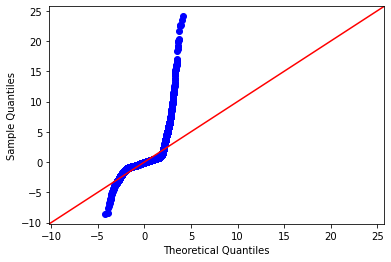

In [134]:
residuals = baseline_model.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True, )    
plt.show;

In [135]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score

In [136]:
X=data_cleaned_filtered.drop(['Price'], axis=1)
y=data_cleaned_filtered['Price']

In [137]:
print(X)

       Transmission  EngineType  EngineCapacity_cc  Mileage_kms  Year
0                 1           1             1500.0        41371     6
1                 1           1             1600.0         2460     6
2                 1           1             1000.0        67000     5
3                 1           1              660.0        64000     5
4                 1           1             2700.0        64000     6
...             ...         ...                ...          ...   ...
76685             2           1              800.0        59500     6
76686             1           1             1800.0       199000     4
76687             1           1             2000.0          180     6
76688             2           1              800.0        16300     6
76689             2           1              800.0        69000     5

[70402 rows x 5 columns]


In [138]:
print(y)

0         3150000.0
1         3575000.0
2         1955000.0
3         1450000.0
4        19000000.0
            ...    
76685      890000.0
76686     2700000.0
76687     5900000.0
76688     1170000.0
76689      690000.0
Name: Price, Length: 70402, dtype: float64


In [139]:
#spliting datas for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [140]:
X_train

,Transmission,EngineType,EngineCapacity_cc,Mileage_kms,Year
51682,2,1,1300.0,130000,5
16335,2,1,1300.0,12500,6
57294,1,1,1600.0,114500,5
48245,2,1,1500.0,78000,3
12066,1,1,5000.0,25000,6
...,...,...,...,...,...
40692,1,1,1600.0,88000,4
6948,2,1,1300.0,20500,1
59868,1,1,660.0,42000,6
933,2,1,1000.0,70000,5


In [141]:
X_test

,Transmission,EngineType,EngineCapacity_cc,Mileage_kms,Year
12272,1,1,1600.0,146000,5
32931,1,1,1500.0,10000,1
45893,2,1,1000.0,60532,3
66619,2,1,800.0,125000,4
42022,2,1,1000.0,60000,4
...,...,...,...,...,...
17907,2,1,1300.0,90000,5
75581,1,1,4600.0,44000,4
37185,1,1,1000.0,123568,3
30073,2,1,1500.0,280743,3


In [142]:
y_train

51682     2250000.0
16335     2650000.0
57294     1825000.0
48245     1250000.0
12066    25900000.0
            ...    
40692     2350000.0
6948       550000.0
59868     1800000.0
933        830000.0
17363     1795000.0
Name: Price, Length: 52801, dtype: float64

In [143]:
y_test

12272     1790000.0
32931     1350000.0
45893      630000.0
66619      607000.0
42022      790000.0
            ...    
17907     1620000.0
75581    16500000.0
37185     1460000.0
30073     1070000.0
69628     1050000.0
Name: Price, Length: 17601, dtype: float64

In [144]:
#performing scaling (standardization) for baselinemodel
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [145]:
X_train

array([[ 1.16552604, -0.3226595 , -0.26085087,  0.7069289 ,  0.15850807],
       [ 1.16552604, -0.3226595 , -0.26085087, -1.29053752,  0.94822163],
       [-0.85798169, -0.3226595 ,  0.15526273,  0.44343333,  0.15850807],
       ...,
       [-0.85798169, -0.3226595 , -1.14855987, -0.78904595,  0.94822163],
       [ 1.16552604, -0.3226595 , -0.67696446, -0.31305395,  0.15850807],
       [ 1.16552604, -0.3226595 , -0.26085087,  0.87692604,  0.15850807]])

In [146]:
##loading the linear regression model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [147]:
#model evaluating
train_pred = linreg.predict(X_train)

In [148]:
#prediction on training data
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred_train = linreg.predict(X_train)

In [149]:
#comparing the predicted value with original value
#r2 error
error_score=metrics.r2_score(y_train, y_pred_train)
print('R2 error:', error_score)

R2 error: 0.5553417731642898


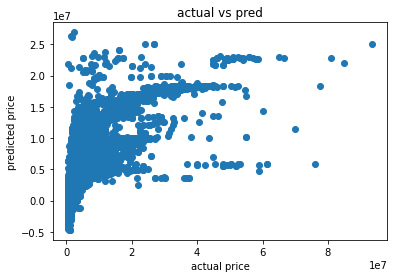

In [150]:
#visualize actual price with predicted price on train data
plt.scatter(y_train , y_pred_train)
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.title('actual vs pred')
plt.show()

In [151]:
#prediction on testing data
y_pred_test = linreg.predict(X_test)

In [152]:
#comparing the predicted value with original test value
#r2 error
error_score_test=metrics.r2_score(y_test, y_pred_test)
print('R2 error:', error_score_test)

R2 error: 0.5421822098512367


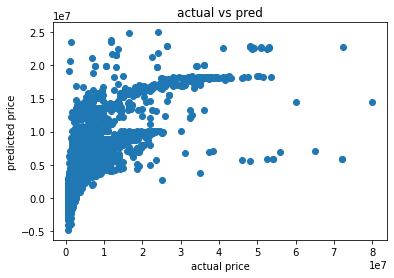

In [153]:
#visualize actual price with predicted price on test data
plt.scatter(y_test, y_pred_test)
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.title('actual vs pred')
plt.show()

In [154]:
#calculating the mse
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)

Train Mean Squared Error: 8286918407900.833
Test Mean Squared Error: 9038313310313.914


In [155]:
#performing cv test and comparing with train and test MSE 
mse = make_scorer(mean_squared_error)
cv_10_results = cross_val_score(linreg, X, y, cv=10, scoring=mse)
cv_10_results.mean()

8517201049696.947

In [156]:
train_residuals = y_pred_train - y_train
test_residuals = y_pred_test - y_test

# model 2

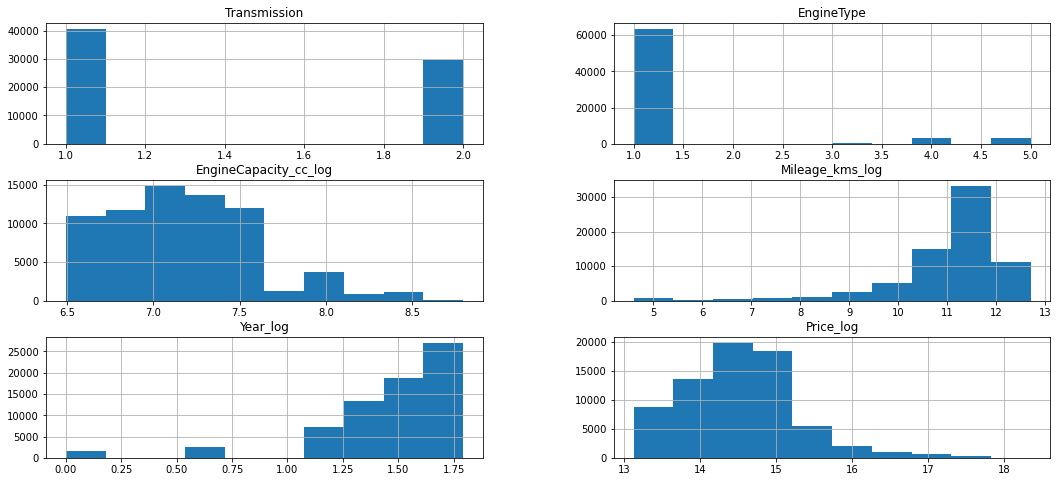

In [157]:
#perform log transformation for normalization

data_log = pd.DataFrame([])
   
data_log['Transmission'] = (data_cleaned_filtered['Transmission'])
data_log['EngineType'] = (data_cleaned_filtered['EngineType'])
data_log['EngineCapacity_cc_log'] = np.log(data_cleaned_filtered['EngineCapacity_cc'])
data_log['Mileage_kms_log'] = np.log(data_cleaned_filtered['Mileage_kms'])
data_log['Year_log'] = np.log(data_cleaned_filtered['Year'])
data_log['Price_log'] = np.log(data_cleaned_filtered['Price'])

   
data_log.hist(figsize  = [18,8]);

In [158]:
data_log.columns

Index(['Transmission', 'EngineType', 'EngineCapacity_cc_log',
       'Mileage_kms_log', 'Year_log', 'Price_log'],
      dtype='object')

In [159]:
outcome = 'Price_log'
x_cols = ['Transmission', 'EngineType', 'EngineCapacity_cc_log',
       'Mileage_kms_log', 'Year_log']
predictors = '+'.join(x_cols)
formula= outcome + '~' + predictors
model_2 = ols(formula=formula, data=data_log).fit()


model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Price_log   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                 5.444e+04
Date:                Mon, 07 Nov 2022   Prob (F-statistic):               0.00
Time:                        10:47:17   Log-Likelihood:                -25262.
No. Observations:               70402   AIC:                         5.054e+04
Df Residuals:                   70396   BIC:                         5.059e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 5.8997      0.032    184.750      0.000       5.837       5.962
Transmission             -0.4268      0.003   -147.687      0.000      -0.432      -0.421
EngineType                0.0097      0.001      7.163      0.000       0.007       0.012
EngineCapacity_cc_log     1.2011      0.004    340.020      0.000       1.194       1.208
Mileage_kms_log          -0.0702      0.001    -61.438      0.000      -0.072      -0.068
Year_log                  0.8838      0.004    220.940      0.000       0.876       0.892
==============================================================================
Omnibus:                     8536.549   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22735.813
Skew:                           0.683   Prob(JB):                         0.00
Kurtosis:                       5.426   Cond. No.                         332.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Model 2 ,after performing normalization .Provided the best fit with 0.795 of R squared value which mean 79.5% of the data is explained .

Performed a validation with T-test, with a result of Mean Squared Error(MSE):0.11

performed Cross validation test ,  resulted in 0.12

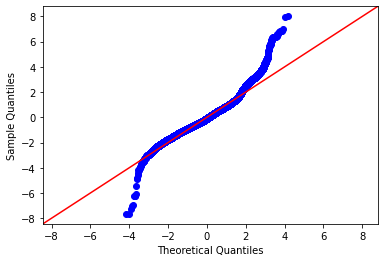

In [160]:
residuals = model_2.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True, )    
plt.show;

In [161]:
#identify x and y of the datalog for train-test split

X = data_log.drop('Price_log', axis=1)
y = data_log['Price_log']

data_log

,Transmission,EngineType,EngineCapacity_cc_log,Mileage_kms_log,Year_log,Price_log
0,1,1,7.313220,10.630335,1.791759,14.962913
1,1,1,7.377759,7.807917,1.791759,15.089476
2,1,1,6.907755,11.112448,1.609438,14.485901
3,1,1,6.492240,11.066638,1.609438,14.187074
4,1,1,7.901007,11.066638,1.791759,16.759950
...,...,...,...,...,...,...
76685,2,1,6.684612,10.993732,1.791759,13.698977
76686,1,1,7.495542,12.201060,1.386294,14.808762
76687,1,1,7.600902,5.192957,1.791759,15.590463
76688,2,1,6.684612,9.698920,1.791759,13.972514


In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)

In [163]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

52801 17601 52801 17601


In [164]:
print(X_train)

       Transmission  EngineType  EngineCapacity_cc_log  Mileage_kms_log  \
66483             1           1               7.495542        11.918391   
22391             2           1               6.907755        11.502875   
22155             2           1               6.907755        10.571317   
58474             1           3               7.170120        12.100712   
67895             2           1               6.684612        10.085809   
...             ...         ...                    ...              ...   
12755             1           1               7.495542        10.950807   
59533             2           1               6.684612        11.239002   
61886             2           1               7.377759        12.156541   
33619             2           1               7.170120        11.904968   
12818             2           1               6.907755        11.512925   

       Year_log  
66483  1.609438  
22391  1.386294  
22155  1.609438  
58474  1.386294  
67895  1.

In [165]:
print(X_test)

       Transmission  EngineType  EngineCapacity_cc_log  Mileage_kms_log  \
17990             2           1               7.170120        11.643954   
28986             1           1               7.495542        11.451050   
63649             2           1               7.170120        12.611538   
27030             2           1               7.170120        11.918391   
24044             1           5               7.937375        11.326596   
...             ...         ...                    ...              ...   
37761             2           1               7.170120        11.225243   
37074             2           1               6.684612        10.680516   
55226             1           1               7.313220         6.684612   
45109             1           4               7.495542        10.950807   
62494             1           1               6.492240        10.596635   

       Year_log  
17990  1.609438  
28986  1.386294  
63649  1.386294  
27030  1.386294  
24044  1.

In [166]:
#loading the linear regression model
linreg = LinearRegression()
linreg.fit(X_train, y_train)
#model evaluation
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)
#calculating the mse
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)

Train Mean Squared Error: 0.11995025028665633
Test Mean Squared Error: 0.12018623873919616


In [167]:
#performing cv test and comparing with train and test MSE
mse = make_scorer(mean_squared_error)
cv_10_results = cross_val_score(linreg, X, y, cv=10, scoring=mse)
cv_10_results.mean()

0.12027851529574167